# What you'll learn

* What scripts are.
* The components that make up a script.
* How to use variables in your scripts.
* How to perform tests and make decisions.
* How to accept command line arguments.
* How to accept input from a user.

# Scripts

* A script is a command-line program that contains a series of commands.
* Commands contained in the script are executed by an interpreter.
* In case of shell scripts, the shell acts as the interpreter.
* Anything you can execute at the command line, you can put into the script.
* Shell scripts are great at automating tasks.

# Simple Shell Script

**script.sh**

```bash
#!/bin/bash    # specifying the shell to be used while executing the script. Here, we mention using the 'bash' shell. If it is not specified, then the system will use the default shell.
echo "Scripting is fun!"
```

**Execute the script**:

```bash
$ chmod 755 script.sh        # setting execute (X) permission for owner, group & others
$ ./script.sh
Scripting is fun!
$
```

> **Note**: To be able to execute a file/script, we need to make sure that the file/script has **execute** permission set. 

# Shebang (#!)

* The **Shebang (#!)** should be the first line of the script, followed by the **interpreter** to be used for interpreting the script commands.
* If it is not specified, then the system will use whatever default shell is configured.

Here are three scripts, each using a different interpreter.

**sript1.sh**
```bash
#!/bin/csh
echo "This script uses csh as the interpreter."
```

**sript2.sh**
```bash
#!/bin/ksh
echo "This script uses ksh as the interpreter."
```

**sript3.sh**
```bash
#!/bin/zsh
echo "This script uses zsh as the interpreter."
```

When we execute a script that contains a **shebang**, what actually happens is that:
* the **interpreter** is executed, and
* the path used to call the script is passed as an argument to the interpreter.

> You can prove this by examining the process table.

# sleepy.sh

```bash
#!/bin/bash
sleep 90
```

---

```bash
$ ./sleepy.sh &       # & is used to run a process in the background
[1] 16796

$ ps -fp 16796
UID PID PPID C STIME TTY TIME CMD
jason 16796 16725 0 22:50 pts/0 00:00:00
/bin/bash ./sleepy.sh

$
```

# The interpreter executes the script

```bash
$ /tmp/sleepy.sh &        # using full path of the script.
[1] 16804

$ ps -fp 16804
UID PID PPID C STIME TTY TIME CMD
jason 16804 16725 0 22:51 pts/0 00:00:00
/bin/bash /tmp/sleepy.sh

$ ps -ef | grep 16804 | grep -v grep
jason 16804 16725 0 22:51 pts/0 00:00:00
/bin/bash /tmp/sleepy.sh
jason 16805 16804 0 22:51 pts/0 00:00:00
sleep 90

$ pstree –p 16804
sleepy.sh(16804)───sleep(16805)

$
```

# Shebang or Not to Shebang

* If you do not specify a shebang and specify an interpreter on the first line of the script.
* The commands are executed using your current default shell.
* You might get lucky. Maybe. Hopefully.
* Different shells have slightly varying syntax.
* Best practice is to specify the exact interpreter to be used for the script execution.

# More than just shell scripts

* It is not necessary to only shell as the interpreter for your script.
* You can use any other interpreter program, such as Python, etc.

```bash
#!/usr/bin/python
print "This is a Python script."
```

---

```bash
$ chmod 755 hi.py

$ ./hi.py
This is a Python script.

$
```

# Variables

* Storage locations that have a name.
* Name-value pairs.
* Syntax: `VARIABLE_NAME="Value"`. Make sure not to use any space before or after the equal sign.
* Variables are case sensitive.
* By convention, variables are uppercase.

# Variable Usage

* To use a variable, simply put a **dollar($) sign** before it.
* You can also enclose the variable name in curly braces {} and precede the opening brace with a dollar($) sign.
* The curly brace is optional, unless you need to append any additional data exactly after the variable.

> Note: If a variable name doesn't exist, the shell will not throw any error. It will simply do nothing and skip it as empty.

**Example 1**:
```bash
#!/bin/bash
MY_SHELL="bash"
echo "I like the $MY_SHELL shell."
```
     
---

**Example 2**:
```bash
#!/bin/bash
MY_SHELL="bash"
echo "I like the ${MY_SHELL} shell."
```

---

**Example 3**:
```bash
#!/bin/bash
MY_SHELL="bash"
echo "I am ${MY_SHELL}ing on my keyboard."
```

Output:
I am bashing on my keyboard.

---

**Example 4**:
```bash
#!/bin/bash
MY_SHELL="bash"
echo "I am $MY_SHELLing on my keyboard."
```

Output:
I am on my keyboard.

# Assign command output to a variable

**Example 1**:

```bash
#!/bin/bash
SERVER_NAME=$(hostname)           # Latest syntax style is to use $(variable)
echo "You are running this script
on ${SERVER_NAME}."
```

Output: You are running this script on linuxsvr

---

**Example 2**:

```bash
#!/bin/bash
SERVER_NAME=`hostname`          # old syntax style is to use back ticks `variable`
echo "You are running this script
on ${SERVER_NAME}."
```

Output: You are running this script on linuxsvr

# Variable Names

**Valid**:
```bash
FIRST3LETTERS="ABC"
FIRST_THREE_LETTERS="ABC"
firstThreeLetters="ABC"
```

**Invalid**:
```bash
3LETTERS="ABC"
first-three-letters="ABC"
first@Three@Letters="ABC"
```

# Tests 

* To create a test, place a conditional expression between the brackets.
* We can test for several types of situations.

**Syntax**: `[ condition-to-test-for ]`

**Example**: `[ -e /etc/passwd ]`

This check tests to see if the `/etc/passwd` file exists or not.
* If it does, it returns true (**exit status = 0**).
* Otherwise, returns false (**exit status = 1**).

> Type **`man test`** to see the list of available tests.

**File operators (tests)**
* **`-d` FILEPATH**:  True if file is a directory.
* **`-e` FILEPATH**:  True if file exists.
* **`-f` FILEPATH**:  True if file exists and is a regular file.
* **`-r` FILEPATH**:  True if file is readable by you.
* **`-s` FILEPATH**:  True if file exists and is not empty.
* **`-w` FILEPATH**:  True if the file is writable by you.
* **`-x` FILEPATH**:  True if the file is executable by you

**String operators (tests)**:
* **`-z` STRING**:  True if string is empty.
* **`-n` STRING**:  True if string is not empty.
* **STRING1 = STRING2**:  True if the strings are equal.
* **STRING1 != STRING2**:  True if the strings are not equal

# Arithmetic operators (tests)

* `arg1 –eq arg2`: True if arg1 is equal to arg2.
* `arg1 –ne arg2`: True if arg1 is not equal to arg2.
* `arg1 –lt arg2`: True if arg1 is less than arg2.
* `arg1 –le arg2`: True if arg1 is less than or equal to arg2.
* `arg1 –gt arg2`: True if arg1 is greater than arg2.
* `arg1 –ge arg2`: True if arg1 is greater than or equal to arg2.

# Making Decisions - The if statement


**Syntax**:
```bash
if [ condition-is-true ]
then
    command 1
    command 2
    command N
fi
```

**Example**:
```bash
#!/bin/bash

MY_SHELL="bash"

if [ "$MY_SHELL" = "bash" ]
then
    echo "You seem to like the bash shell."
fi
```

Output: You seem to like the bash shell.

> Note: Best practice is to enclose variables with quotes while performing any conditional test to avoid any unintended side effects.

# if-else

**Syntax**:
```bash
if [ condition-is-true ]
then
    command N
else
    command N
fi
```

**Example**:
```bash
#!/bin/bash

MY_SHELL="csh"

if [ "$MY_SHELL" = "bash" ]
then
    echo "You seem to like the bash shell."
else
    echo "You don't seem to like the bash shell."
fi
```

# if-elif-else

**Syntax**:
```bash
if [ condition-is-true ]
then
    command N
elif [ condition-is-true ]
then
    command N
else
    command N
fi
```

**Example**:
```bash
#!/bin/bash

MY_SHELL="csh"

if [ "$MY_SHELL" = "bash" ]
then
    echo "You seem to like the bash shell."
elif [ "$MY_SHELL" = "csh" ]
then
    echo "You seem to like the csh shell."
else
    echo "You don't seem to like the bash or csh shells."
fi
```

# For loop

**Syntax**:
```bash
for VARIABLE_NAME in ITEM_1 ITEM_N
do
    command 1
    command 2
    command N
done
```

**Example 1**:
```bash
#!/bin/bash
for COLOR in red green blue
do
echo "COLOR: $COLOR"
done
```

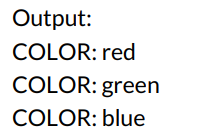

**Example 2**:
```bash
#!/bin/bash

COLORS="red green blue"

for COLOR in $COLORS
do
    echo "COLOR: $COLOR"
done
```

**Example 3**:
```bash
#!/bin/bash

PICTURES=$(ls *jpg)
DATE=$(date +%F)

for PICTURE in $PICTURES
do
    echo "Renaming ${PICTURE} to ${DATE}-${PICTURE}"
    mv ${PICTURE} ${DATE}-${PICTURE}
done
```

----

**Executing Example 3 script**:

```bash
$ ls
bear.jpg man.jpg pig.jpg rename-pics.sh

$ ./rename-pics.sh
Renaming bear.jpg to 2015-03-06-bear.jpg
Renaming man.jpg to 2015-03-06-man.jpg
Renaming pig.jpg to 2015-03-06-pig.jpg

$ ls
2015-03-06-bear.jpg 2015-03-06-man.jpg
2015-03-06-pig.jpg rename-pics.sh

$
```

# Positional Parameters

```bash
$ script.sh parameter1 parameter2 parameter3
```
* `$0`: "script.sh"
* `$1`: "parameter1"
* `$2`: "parameter2"
* `$3`: "parameter3"

**Example: `archive_user.sh` version 1**
```bash
#!/bin/bash

echo "Executing script: $0"
echo "Archiving user: $1"

# Lock the account
passwd –l $1

# Create an archive of the home directory.
tar cf /archives/${1}.tar.gz /home/${1}
```

**Execute: `archive_user.sh` version 1**
```bash
$ ./archive_user.sh elvis
Executing script: ./archive_user.sh
Archiving user: elvis
passwd: password expiry information changed.
tar: Removing leading '/' from member names

$
```

---

**Example: `archive_user.sh` version 2**
```bash
#!/bin/bash

USER=$1 # The first parameter is the user.
echo "Executing script: $0"
echo "Archiving user: $USER"

# Lock the account
passwd –l $USER

# Create an archive of the home directory.
tar cf /archives/${USER}.tar.gz /home/${USER}
```

---

**Example: `archive_user.sh` version 3**
```bash
#!/bin/bash

echo "Executing script: $0"
for USER in $@                 # Note the array or list of all positional command-line arguments is represented by $@
do
echo "Archiving user: $USER"

# Lock the account
passwd –l $USER

# Create an archive of the home directory.
tar cf /archives/${USER}.tar.gz /home/${USER}
done
```

**Execute: `archive_user.sh` version 3**
```bash
$ ./archive_user.sh chet joe
Executing script: ./archive_user.sh
Archiving user: chet
passwd: password expiry information changed.
tar: Removing leading '/' from member names
Archiving user: joe
passwd: password expiry information changed.
tar: Removing leading '/' from member names

$
```

# Accepting User Input (STDIN)

The read command accepts STDIN.

**Syntax**:
```bash
read -p "PROMPT" VARIABLE
```

**Example: `archive_user.sh`**
```bash
#!/bin/bash

read –p "Enter a user name: " USER
echo "Archiving user: $USER"

# Lock the account
passwd –l $USER

# Create an archive of the home directory.
tar cf /archives/${USER}.tar.gz /home/${USER}
```

**Execute: `archiver_user.sh`**
```bash
$ ./archive_user.sh
Enter a user name: mitch
Archiving user: mitch
passwd: password expiry information changed.
tar: Removing leading '/' from member names

$
```

# Summary

```bash
#!/path/to/interpreter

VARIABLE_NAME="Value"
$VARIABLE_NAME
${VARIABLE_NAME}
VARIABLE_NAME=$(command)



# if-elif-else statement

if [ condition-is-true ]
then
    commands
elif [ condition-is-true ]
then
    commands
else
    commands
fi


# For Loop

for VARIABLE_NAME in ITEM_1 ITEM_N
do
    command 1
    command 2
    command N
done

```

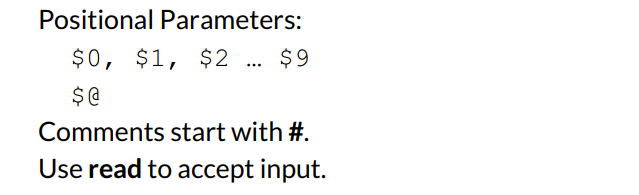